# 生成器的回顾，yield方法的执行流程

In [1]:
def generate():
    i = 0
    while i < 5:
        print("我在这...")
        xx = yield i 
        print(xx)
        i += 1
        
g = generate()
g.send(None)

g.send("lalala")

我在这...
lalala
我在这...


1

In [3]:
"""
通过生成器实现生产者-消费者模型，生产者生产消息后，直接通过yield跳转到消费者开始执行，
待消费者执行完毕后，切换回生产者继续生产，效率极高
"""

def consumer():
    print("--4.开始执行生成器代码--")
    response = None
    while True:
        print("--5.yield，中断、保存上下文--")
        n = yield response 
        print("--8.获取上下文，继续往下执行--")
        if not n:
            return
        print("[Consumer]:consuming {} ..".format(n))
        response = "OK"

def produce(c):
    print("--3.启动生成器，开始执行生成器consumer--")
    c.send(None)
    print("--6.继续往下执行--")
    n = 0
    while n < 5:
        n += 1
        print("[Producer]:producing {}...".format(n))
        print("--7.第{}次唤醒生成器，从yield位置往下继续执行!--".format(n+1))
        r = c.send(n) # 第二次唤醒生成器
        print("--9.从第8步往下--")
        print("[Producer]:consumer return {}..".format(r))
    c.close()

In [4]:
c = consumer()
produce(c) # 运行produce函数

--3.启动生成器，开始执行生成器consumer--
--4.开始执行生成器代码--
--5.yield，中断、保存上下文--
--6.继续往下执行--
[Producer]:producing 1...
--7.第2次唤醒生成器，从yield位置往下继续执行!--
--8.获取上下文，继续往下执行--
[Consumer]:consuming 1 ..
--5.yield，中断、保存上下文--
--9.从第8步往下--
[Producer]:consumer return OK..
[Producer]:producing 2...
--7.第3次唤醒生成器，从yield位置往下继续执行!--
--8.获取上下文，继续往下执行--
[Consumer]:consuming 2 ..
--5.yield，中断、保存上下文--
--9.从第8步往下--
[Producer]:consumer return OK..
[Producer]:producing 3...
--7.第4次唤醒生成器，从yield位置往下继续执行!--
--8.获取上下文，继续往下执行--
[Consumer]:consuming 3 ..
--5.yield，中断、保存上下文--
--9.从第8步往下--
[Producer]:consumer return OK..
[Producer]:producing 4...
--7.第5次唤醒生成器，从yield位置往下继续执行!--
--8.获取上下文，继续往下执行--
[Consumer]:consuming 4 ..
--5.yield，中断、保存上下文--
--9.从第8步往下--
[Producer]:consumer return OK..
[Producer]:producing 5...
--7.第6次唤醒生成器，从yield位置往下继续执行!--
--8.获取上下文，继续往下执行--
[Consumer]:consuming 5 ..
--5.yield，中断、保存上下文--
--9.从第8步往下--
[Producer]:consumer return OK..


# 使用greenlet实现协程

In [7]:
from greenlet import greenlet
import time

In [9]:
def task1():
    while True:
        print("--This is task 1!--")
        g2.switch() # 切换到g2中运行-
        time.sleep(0.5)

def task2():
    while True:
        print("--This is task 2!--")
        g1.switch()
        time.sleep(0.5)
        
g1 = greenlet(task1)
g2 = greenlet(task2)

g1.switch() # 切换到g1中运行

--This is task 1!--
--This is task 2!--
--This is task 1!--
--This is task 2!--
--This is task 1!--
--This is task 2!--
--This is task 1!--
--This is task 2!--
--This is task 1!--
--This is task 2!--
--This is task 1!--
--This is task 2!--
--This is task 1!--


KeyboardInterrupt: 

In [25]:
"""
上述的greenlet模块实现了协程，但是需要人工切换，很麻烦。
python中还有一个比greenlet更强大的并且能够自动切换任务模块gevent
其原理就是当一个greenlet遇到IO(比如网络、文件操作等)操作时，
比如网络访问，就自动切换到其他的greenlet，等到IO操作完成时，再在适当的时候切换回来继续执行‘
由于IO操作非常耗时，经常时程序处于等待状态，有了gevent为我们自动切换协程，就保证总有greenlet在运行，而不是等待IO
"""

import gevent

def task_1(num):
    for i in range(num):
        print(gevent.getcurrent(), i)
        gevent.sleep(1)  # 模拟一个耗时操作，注意不能使用time模块的sleep
        
g1 = gevent.spawn(task_1, 5)  # 创建协程
g2 = gevent.spawn(task_1, 5)
g3 = gevent.spawn(task_1, 5)

g1.join()  # 等待协程运行完毕
g2.join()
g3.join()

<Greenlet at 0x106a98048: task_1(5)> 0
<Greenlet at 0x106a98348: task_1(5)> 0
<Greenlet at 0x106a98448: task_1(5)> 0
<Greenlet at 0x106a98048: task_1(5)> 1
<Greenlet at 0x106a98348: task_1(5)> 1
<Greenlet at 0x106a98448: task_1(5)> 1
<Greenlet at 0x106a98048: task_1(5)> 2
<Greenlet at 0x106a98348: task_1(5)> 2
<Greenlet at 0x106a98448: task_1(5)> 2
<Greenlet at 0x106a98048: task_1(5)> 3
<Greenlet at 0x106a98348: task_1(5)> 3
<Greenlet at 0x106a98448: task_1(5)> 3
<Greenlet at 0x106a98048: task_1(5)> 4
<Greenlet at 0x106a98348: task_1(5)> 4
<Greenlet at 0x106a98448: task_1(5)> 4


In [ ]:
# monkey补丁 不必强制使用gevent里面的sleep、socket等等了

from gevent import monkey
import gevent
import random
import time

def task_1(name):
    for i in range(5):
        print(name, i)
        time.sleep(1)  # 协程遇到耗时操作后会自动切换其他协程运行
        
def task_2(name):
    for i in range(3):
        print(name, i)
        time.sleep(1)
        
if __name__ == "__main__":
    monkey.patch_all()  # 给所有的耗时操作打上补丁

    gevent.joinall([  # 等到协程运行完毕
        gevent.spawn(task_1, "task_1"),  # 创建协程
        gevent.spawn(task_2, "task_2")
    ])
    print("the main thread!")

task_1 0
task_2 0
task_1 1
task_2 1
task_1 2
task_2 2
task_1 3
task_1 4
the main thread!


# 异步协程

## 1、定义一个协程 

In [4]:
"""
定义一个协程，通过async定义一个协程，协程是一个对象，不能直接运行。
需要把协程加入到事件循环loop中，由loop在适当的时候调用协程。asyncio.get_event_loop()方法可以创建一个
事件循环，然后由run_until_complete 协程对象 将协程注册到时间循环中，并启动事件循环。

run_until_complete根据传递的参数的不同，返回的结果也有所不同

1、run_until_complete()传递的是一个协程对象或task对象，则返回他们finished的返回结果（前提是他们得有return的结果，否则返回None）
2、run_until_complete(asyncio.wait(多个协程对象或任务))，函数会返回一个元组包括（done, pending），通过访问done里的task对象，获取返回值
3、run_until_complete(asyncio.gather(多个协程对象或任务))，函数会返回一个列表，列表里面包括各个任务的返回结果，按顺序排列

python 3.7 以前的版本调用异步函数的步骤：

1、调用asyncio.get_event_loop()函数获取事件循环loop对象
2、通过不同的策略调用loop.run_forever()方法或者loop.run_until_complete()方法执行异步函数

python3.7 以后的版本使用asyncio.run即可。此函数总是会创建一个新的事件循环并在结束时关闭之。它应当被用作 asyncio 程序的主入口点，理想情况下应当只被调用一次。
"""

import asyncio
# 如果在pycharm中不需要添加后面两行
import nest_asyncio
nest_asyncio.apply()

async def work(x):  # 通过async关键字定义一个协程
    for _ in range(3):
        print('Work {} is running ..'.format(x))

coroutine_1 = work(1)  # 协程是一个对象，不能直接运行

# 方式一：
loop = asyncio.get_event_loop()  # 创建一个事件循环
result = loop.run_until_complete(coroutine_1)  # 将协程对象加入到事件循环中，并执行
print(result)  # 协程对象并没有返回结果，打印None
# 方式二：
# asyncio.run(coroutine_1)  #创建一个新的事件循环，并以coroutine_1为程序的主入口，执行完毕后关闭事件循环

Work 1 is running ..
Work 1 is running ..
Work 1 is running ..
None


In [10]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

async def main():
    print("hello")
    await asyncio.sleep(1)
    print("world")
    
# async def main2():
#     print("hello1")
#     await asyncio.sleep(1)
#     print("world2")
    
# asyncio.run(main2())

asyncio.run(main())  # 在事件循环中只有一个协程，所以没有挂起任务执行其他任务这一过程


# 运行结果先打印hello然后等待1秒打印world

hello
world


## 2、创建一个task 

In [16]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

async def work(x):  # 通过async关键字定义一个协程
    for _ in range(3):
        print('Work {} is running ..'.format(x))

coroutine_1 = work(1)  # 协程是一个对象，不能直接运行
 
loop = asyncio.get_event_loop()
task = loop.create_task(coroutine_1)
# task = asyncio.ensure_future(coroutine_1)  # 这样也能创建一个task
print(task)
loop.run_until_complete(task)  # run_until_complete接受的参数是一个future对象，当传人一个协程时，其内部自动封装成task
print(task)
# print(type(task).__repr__)

<Task pending coro=<work() running at <ipython-input-16-823ea7a95887>:5>>
Work 1 is running ..
Work 1 is running ..
Work 1 is running ..
<Task finished coro=<work() done, defined at <ipython-input-16-823ea7a95887>:5> result=None>


## 3、绑定回调

In [20]:
import asyncio

async def work(x):
    for _ in range(3):
        print('Work {} is running ..'.format(x))
    print("1...")
    return "Work {} is finished".format(x)

def call_back(future):
    print("2...")
    print(future.result())
    print("Callback: {}".format(future.result()))
    
coroutine = work(1)
loop = asyncio.get_event_loop()
task = asyncio.ensure_future(coroutine)
task.add_done_callback(call_back)
loop.run_until_complete(task)  # 返回任务的结果

Work 1 is running ..
Work 1 is running ..
Work 1 is running ..
1...
2...
Work 1 is finished
Callback: Work 1 is finished


'Work 1 is finished'

In [18]:
"""
当回调函数需要传递多个参数时，可以使用functools里的partial方法（偏函数导入这些参数）
functools.partial(func, * args, * * keywords)，函数装饰器，返回一个新的partial对象。调用partial对象和调用被修饰的函数func相同，只不过调用partial对象时传入的参数个数通常要少于调用func时传入的参数个数。当一个函数func可以接收很多参数，而某一次使用只需要更改其中的一部分参数，其他的参数都保持不变时，partial对象就可以将这些不变的对象冻结起来，这样调用partial对象时传入未冻结的参数，partial对象调用func时连同已经被冻结的参数一同传给func函数，从而可以简化调用过程。

如果调用partial对象时提供了更多的参数，那么他们会被添加到args的后面，如果提供了更多的关键字参数，那么它们将扩展或者覆盖已经冻结的关键字参数。

具体的偏函数使用方法见下例：
"""

from functools import partial

def func(a, b):
    return a + b

# 正常使用
result = func(1, 2)

# 使用偏函数导入一个参数，返回一个新函数
new_func = partial(func, 1)  # 相当于把原函数中的第一个参数a固定一个值为1，新函数只需要传入一个参数b即可
result2 = new_func(2)

print(result, result2)

3 3


In [23]:
import asyncio
import functools

async def work(x):
    for _ in range(3):
        print('Work {} is running ..'.format(x))
    return "Work {} is finished".format(x)

    
def call_back_2(num, future):
    print("Callback_2: {}, the num is {}".format(future.result(), num))
    
coroutine = work(1)
loop = asyncio.get_event_loop()
task = asyncio.ensure_future(coroutine)
task.add_done_callback(functools.partial(call_back_2, 100))
loop.run_until_complete(task)

Work 1 is running ..
Work 1 is running ..
Work 1 is running ..
Callback_2: Work 1 is finished, the num is 100


'Work 1 is finished'

In [25]:
# 在不绑定回调函数的时候，当task处于finished的状态时，可以直接读取task的result的值

import asyncore

async def work(x):
    for _ in range(3):
        print("Work {} is running ..".format(x))
    return "Work {} is finished".format(x)

coroutine = work(1)
loop = asyncio.get_event_loop()
task = asyncio.ensure_future(coroutine)
loop.run_until_complete(task)
# finished状态后 可以直接读取task的result的值
print("The task's result is '{}'".format(task.result()))

Work 1 is running ..
Work 1 is running ..
Work 1 is running ..
The task's result is 'Work 1 is finished'


In [26]:
# 并发运行任务的案例

import asyncio

async def factorial(name, number):
    f = 1
    for i in range(2, number + 1):
        print(f"Task {name}: Compute factorial({i})...")  # python3.7新语法，了解一波
        await asyncio.sleep(1)  # await后面是 可等待对象
        f *= i
    print(f"Task {name}: factorial({number}) = {f}")
    
    return f"Task {name}: Finished!"

async def main():
    # Schedule three calls *concurrently*:
    results = await asyncio.gather(  # results包含所有任务的返回结果，是一个列表，按执行顺序返回结果
        factorial("A", 2),  # 协程，会自动调度为任务
        factorial("B", 3),
        factorial("C", 4),
    )
    print(results)

asyncio.run(main())  # 协程的嵌套，后面有详解

Task C: Compute factorial(2)...
Task B: Compute factorial(2)...
Task A: Compute factorial(2)...
Task C: Compute factorial(3)...
Task B: Compute factorial(3)...
Task A: factorial(2) = 2
Task C: Compute factorial(4)...
Task B: factorial(3) = 6
Task C: factorial(4) = 24
['Task A: Finished!', 'Task B: Finished!', 'Task C: Finished!']


In [27]:
# 超时的案例
import asyncio

async def eternity():
    # Sleep for one hour
    # await asyncio.sleep(0.5)
    await asyncio.sleep(3600)
    print('yay!')

async def main():
    # Wait for at most 1 second
    try:
        await asyncio.wait_for(eternity(), timeout=1.0)  # 等待 可等待对象 完成，超过timeout秒后，抛出asyncio.TimeoutError异常
    except asyncio.TimeoutError:
        print('timeout!')

asyncio.run(main())

timeout!


In [29]:
# 简单等待的案例

import asyncio

async def foo():
    return 42

task = asyncio.create_task(foo())
# 注意：1、这里传递的要是一个任务组，而不能是单个task，如果只有一个任务，可以这样传递：[task](task,){task}
#      2、直接传递协程对象的方式已弃用 即：done, pending = await asyncio.wait([foo()])
done, pending = await asyncio.wait((task, ))

if task in done:
    print(f"The task's result is {task.result()}")

AttributeError: module 'asyncio' has no attribute 'create_task'

In [33]:
# 使用事件循环和asyncio.wait、asyncio.gather实现并发运行任务

import asyncio, time

async def work_1(x):
    print(f"Starting {x}")
    time.sleep(1)
    print(f"Starting {x}")
    for _ in range(3):
        print(f"Work {x} is running ..")
        await asyncio.sleep(2)  # 耗时操作，此时挂起该协程，执行其他协程
    return f"Work {x} is finished"

async def work_2(x):
    print(f"Starting {x}")
    for _ in range(3):
        await asyncio.sleep(1)  # 耗时操作，此时挂起该协程，执行其他协程
        print(f"Work {x} is running ..")
    return f"Work {x} is finished"

coroutine_1 = work_1(1)
coroutine_2 = work_2(2)

loop = asyncio.get_event_loop()  # 创建一个事件循环

# 方式一，asyncio.wait(tasks)接受一个task列表  执行的顺序与列表里的任务顺序有关
tasks = [
    asyncio.ensure_future(coroutine_1),
    asyncio.ensure_future(coroutine_2),
]
# 注册到事件循环中，并执行
dones, pendings = loop.run_until_complete(asyncio.wait(tasks))  # loop.run_until_complete(asyncio.wait(tasks))的作用相当于：await asyncio.wait(tasks)
for task in dones:
    print(task.result())

# 方式二，使用asyncio.gather(*tasks)，接受一堆tasks，tasks也可以是一个列表，使用*解包
# task_1 = asyncio.ensure_future(coroutine_1)
# task_2 = asyncio.ensure_future(coroutine_2)
# task_result_list = loop.run_until_complete(asyncio.gather(task_1, task_2))  # 返回一个列表，里面包含所有task的result()的结果
# print(task_result_list)

Starting 1
Starting 1
Work 1 is running ..
Starting 2
Work 2 is running ..
Work 1 is running ..
Work 2 is running ..
Work 2 is running ..
Work 1 is running ..
Work 1 is finished
Work 2 is finished


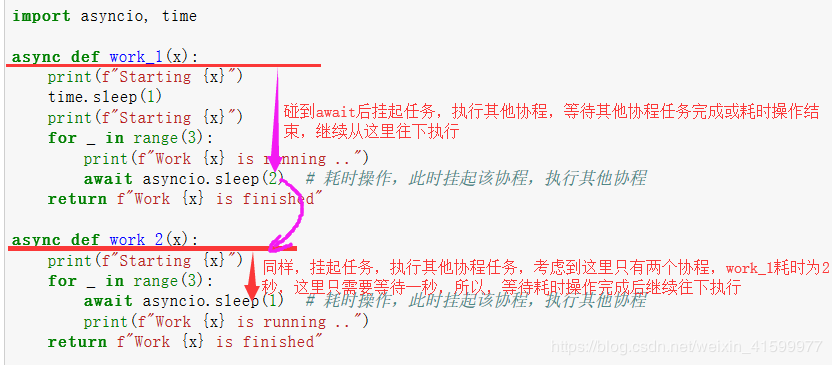

## 协程嵌套

In [34]:
import asyncio, time

async def work(x):
    for _ in range(3):
        print("Work {} is running ..".format(x))
        await asyncio.sleep(1)  # 当执行某个协程时，在任务阻塞的时候用await挂起
    return "Work {} is finished!".format(x)

async def main_work():
    coroutine_1 = work(1)
    coroutine_2 = work(2)
    coroutine_3 = work(3)
    
    tasks = [
        asyncio.ensure_future(coroutine_1),
        asyncio.ensure_future(coroutine_2),
        asyncio.ensure_future(coroutine_3),
    ]
    
    dones, pendings = await asyncio.wait(tasks)
    
    for task in dones:
        print("The task's result is : {}".format(task.result()))
        
if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main_work())

Work 1 is running ..
Work 2 is running ..
Work 3 is running ..
Work 1 is running ..
Work 2 is running ..
Work 3 is running ..
Work 1 is running ..
Work 2 is running ..
Work 3 is running ..
The task's result is : Work 1 is finished!
The task's result is : Work 3 is finished!
The task's result is : Work 2 is finished!


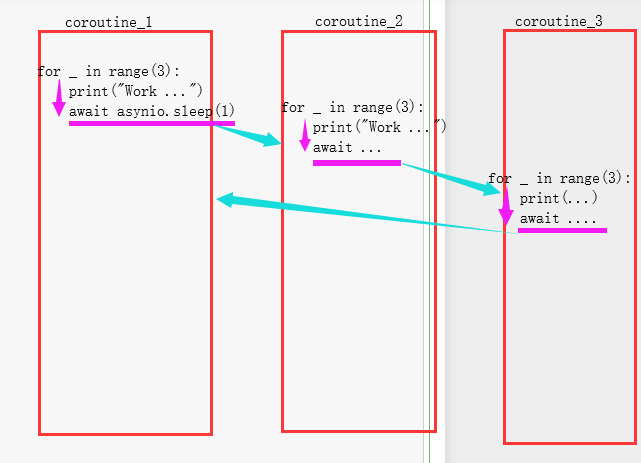

In [2]:
# 使用as_completed方法

import asyncio
import nest_asyncio
nest_asyncio.apply()

async def work(x):
    for _ in range(3):
        print("Work {} is running ..".format(x))
        await asyncio.sleep(1)  # 当执行某个协程时，在任务阻塞的时候用await挂起
    return "Work {} is finished!".format(x)

async def main_work():
    coroutine_1 = work(1)
    coroutine_2 = work(2)
    coroutine_3 = work(3)
    
    tasks = [
        asyncio.ensure_future(coroutine_2),
        asyncio.ensure_future(coroutine_1),
        asyncio.ensure_future(coroutine_3),
    ]

    for task in asyncio.as_completed(tasks):  # 返回一个可迭代对象，每次返回最先完成的任务的结果
        result = await task
        print(f"The task's result is : {result}")
        
if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main_work())

Work 2 is running ..
Work 1 is running ..
Work 3 is running ..
Work 2 is running ..
Work 1 is running ..
Work 3 is running ..
Work 2 is running ..
Work 1 is running ..
Work 3 is running ..
The task's result is : Work 2 is finished!
The task's result is : Work 1 is finished!
The task's result is : Work 3 is finished!


In [3]:
import asyncio
import time

async def work(delay, msg):
    print(f"Task receives the message :'{msg}' ")
    await asyncio.sleep(delay)
    print(msg)

async def main():
    print(f"Started at {time.strftime('%X')}")
    await work(1, "hello")  # 启动一个协程，但是这是同步执行的
    await work(2, "world")
    print(f"Finished at time {time.strftime('%X')}")

asyncio.run(main())
# 运行结果：
# 先打印print(f"Task receives the message :'{msg}' ")然后等待1秒后打印“hello”，
# 然后再次打印print(f"Task receives the message :'{msg}' ")等待2秒后打印“world”

Started at 16:17:04
Task receives the message :'hello' 
hello
Task receives the message :'world' 
world
Finished at time 16:17:07


In [4]:
import asyncio

async def work(x):  # 通过async关键字定义一个协程
    for _ in range(3):
        print('Work {} is running ..'.format(x))
        await asyncio.sleep(1)

coroutine_1 = work(1)  # 协程是一个对象，不能直接运行
coroutine_2 = work(2)

# 启动一个协程，等待它运行完后，继续往下执行（原因是没有将协程对象加到事件循环里，所以按照程序运行方式，顺序执行）
await coroutine_1  
await coroutine_2
print("The main thread")

Work 1 is running ..
Work 1 is running ..
Work 1 is running ..
Work 2 is running ..
Work 2 is running ..
Work 2 is running ..
The main thread


In [6]:
import asyncio
import time

# ensure_future python3.6 利用它创建协程 而python3.7用create_task

async def work(delay, msg):
    print(f"Task receives the message :'{msg}' ")
    print("----1----")
    await asyncio.sleep(delay)
    print("----2----")
    print(msg)

async def main():
    task1 = asyncio.ensure_future(work(1, "hello"))
    task2 = asyncio.ensure_future(work(3, "world"))
    print(f"Started at {time.strftime('%X')}")
    await task1  # 此时并发运行task1和task2
    print("----3----")
    await task2
    print("----4----")
    print(f"Finished at time {time.strftime('%X')}")

asyncio.run(main())
          
# 运行结果说明，首先asyncio.run(main())创建一个事件循环，并以main为主要程序入口，
# 在main中，
# 1、创建俩个任务task1和task2，并加入到事件循环中，
# 2、打印Started at 11:16:08
# 3、执行await task1，此时是并发运行了task1和task2了，

Started at 16:20:58
Task receives the message :'hello' 
----1----
Task receives the message :'world' 
----1----
----2----
hello
----3----
----2----
world
----4----
Finished at time 16:21:01


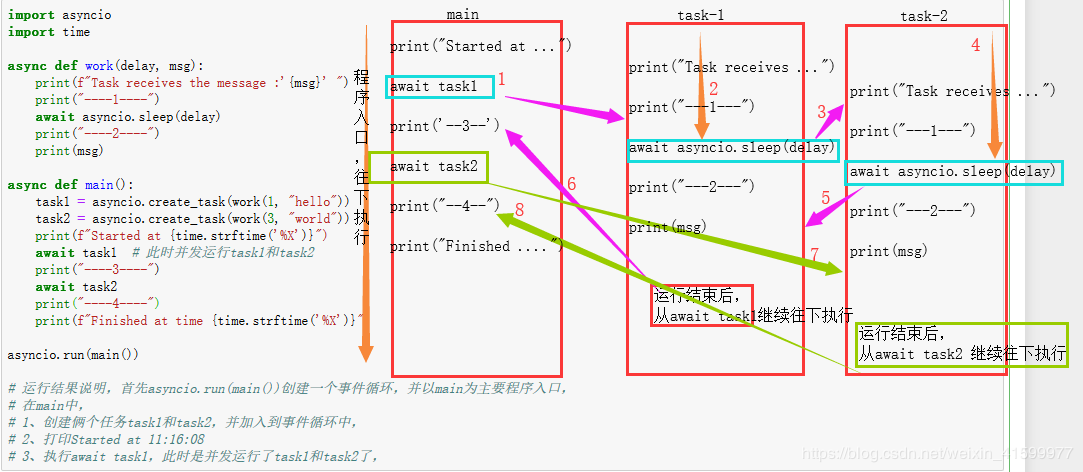

In [8]:
import asyncio

async def work(x):  # 通过async关键字定义一个协程
    for _ in range(3):
        print('Work {} is running ..'.format(x))
        await asyncio.sleep(x)

coroutine_1 = work(1)  # 协程是一个对象，不能直接运行
coroutine_2 = work(2)

task1 = asyncio.ensure_future(coroutine_1)  # 将事件加入了运行队列里，可以并发运行
task2 = asyncio.ensure_future(coroutine_2)

await task1  # 并发运行
await task2
print("The main thread")

Work 1 is running ..
Work 2 is running ..
Work 1 is running ..
Work 2 is running ..
Work 1 is running ..
Work 2 is running ..
The main thread


# 可等待对象有三种主要类型: 协程, 任务 和 Future .

## 协程：python中的协程属于 可等待 对象，所以可以在其他协程中被等待

In [9]:
import asyncio

async def nested():  # async def定义一个协程函数，调用它返回的是协程对象
    return 42

async def main():
    # 直接运行nested()不会得到任何结果，这位这是一个协程对象（协程对象：调用协程函数所返回的对象）
#     nested()

    # await 后面接的是协程，所以他是一个可等待对象，因此可以在其他协程中被等待
    print(await nested())  # will print "42".

asyncio.run(main())  # asyncio.run()运行一个协程

42


## 任务: 是用来设置日程以便 并发 执行协程

In [11]:
# 当一个协程通过 asyncio.create_task() 等函数被打包为一个 任务，该协程将自动排入日程准备立即运行:
import asyncio

async def nested1():
    print("nested1")
    await asyncio.sleep(0.5)
    print("nested1 is finished!")
    return 1

async def nested2():
    print("nested2")
    await asyncio.sleep(0.5)
    print("nested2 is finished!")
    return 2

async def nested3():
    print("nested3")
    await asyncio.sleep(0.5)
    print("nested3 is finished!")
    return 3

async def nested4():
    print("nested4")
    await asyncio.sleep(0.5)
    print("nested4 is finished!")
    return 4

async def main():
    # Schedule nested() to run soon concurrently
    # with "main()".
    print("main")

    task1 = asyncio.ensure_future(nested1())  # 使用asyncio.ensure_future将函数打包成一个任务，该协程将自动排入日程等待运行
    task2 = asyncio.ensure_future(nested2())
    task3 = asyncio.ensure_future(nested3())
    task4 = asyncio.ensure_future(nested4())
    
    await asyncio.sleep(1)  # 在main这个协程中，碰到耗时操作，则挂起任务，执行其他任务，即：task1 or task2 or task3 or task4
    
    # "task" can now be used to cancel "nested()", or
    # can simply be awaited to wait until it is complete:
    print(await task1)  # 等待 task1 如果task1中存在耗时操作，则挂起
    print(await task2)
    print(await task3)
    print(await task4)

asyncio.run(main())  # 并发运行这个5个协程，运行最高层级的入口点main函数

main
nested1
nested2
nested3
nested4
nested1 is finished!
nested2 is finished!
nested3 is finished!
nested4 is finished!
1
2
3
4


In [12]:
# Future对象 Future 是一种特殊的 低层级 可等待对象，表示一个异步操作的 最终结果。
# 当一个 Future 对象 被等待，这意味着协程将保持等待直到该 Future 对象在其他地方操作完毕。
# 用法：
async def main():
    await function_that_returns_a_future_object()  # 返回future对象的函数，比如线程池里的submit函数返回的就是一个future对象

    # this is also valid:
    await asyncio.gather(
        function_that_returns_a_future_object(),
        some_python_coroutine()  # 一些python协程
    )